<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Revision-de-Variables" data-toc-modified-id="Revision-de-Variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Revision de Variables</a></span><ul class="toc-item"><li><span><a href="#Escalamiento-de-Variables-Independientes" data-toc-modified-id="Escalamiento-de-Variables-Independientes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Escalamiento de Variables Independientes</a></span></li><li><span><a href="#Funciones-para-el-procesamiento-de-los-modelos" data-toc-modified-id="Funciones-para-el-procesamiento-de-los-modelos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Funciones para el procesamiento de los modelos</a></span><ul class="toc-item"><li><span><a href="#Función-para-buscar-los-valores-óptimos-dentro-de-la-cuadricula-de-busqueda:-se-ejecuta-mediante-la-función-CVGridSearch." data-toc-modified-id="Función-para-buscar-los-valores-óptimos-dentro-de-la-cuadricula-de-busqueda:-se-ejecuta-mediante-la-función-CVGridSearch.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Función para buscar los valores óptimos dentro de la cuadricula de busqueda: se ejecuta mediante la función CVGridSearch.</a></span></li><li><span><a href="#Función-para-imprimir-el-modelo-en-un-archivo." data-toc-modified-id="Función-para-imprimir-el-modelo-en-un-archivo.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Función para imprimir el modelo en un archivo.</a></span></li><li><span><a href="#Función-para-calcular-la-diferencia-porcentual-entre-las-mejores-y-peores-puntuaciones-mediante-la-función-CVGridSearch" data-toc-modified-id="Función-para-calcular-la-diferencia-porcentual-entre-las-mejores-y-peores-puntuaciones-mediante-la-función-CVGridSearch-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Función para calcular la diferencia porcentual entre las mejores y peores puntuaciones mediante la función CVGridSearch</a></span></li><li><span><a href="#Función-Fit-Classification,-utiliza-el-CVGridSearch-para-generar-los-valores-óptimos." data-toc-modified-id="Función-Fit-Classification,-utiliza-el-CVGridSearch-para-generar-los-valores-óptimos.-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Función Fit Classification, utiliza el CVGridSearch para generar los valores óptimos.</a></span></li><li><span><a href="#Función-Matriz-de-Confusión" data-toc-modified-id="Función-Matriz-de-Confusión-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Función Matriz de Confusión</a></span></li></ul></li></ul></li><li><span><a href="#Modelos" data-toc-modified-id="Modelos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelos</a></span><ul class="toc-item"><li><span><a href="#Modelo-Regresión-Logístico" data-toc-modified-id="Modelo-Regresión-Logístico-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modelo Regresión Logístico</a></span></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gradient Boost</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Práctica Final
* Curso: Machine Learning
* Integrantes: 
    * Marina Ortín
    * Mayra Goicochea

In [93]:
import time
import pickle
import numpy as np
import os
import pandas as pd

In [2]:
import scipy

In [3]:
from sklearn.dummy import DummyClassifier

In [4]:
from IPython.core.display import HTML
pd.set_option('display.max_rows',99999999)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width',None)
import warnings

In [5]:
from sklearn.feature_selection import RFE

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn import preprocessing,metrics 
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, brier_score_loss, mean_squared_error, r2_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.calibration import calibration_curve
from sklearn import linear_model,svm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [12]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [13]:
import itertools
from sklearn.metrics import confusion_matrix

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
filename ='../data/2_TrainSet.gz'
loan_train = pd.read_csv(filename, compression='gzip',low_memory=False)

In [101]:
loan_train.shape

(980547, 61)

In [97]:
filename ='../data/2_TestSet.gz'
loan_test = pd.read_csv(filename, compression='gzip',low_memory=False)

Colocamos la columna Credit Risk en la ultima posición:

In [17]:
cols = loan_train.drop(['credit_risk',],axis=1).columns.tolist()
cols.pop(0)
cols.append('credit_risk')
loan_train = loan_train[cols]

In [102]:
cols = loan_test.drop(['credit_risk',],axis=1).columns.tolist()
cols.pop(0)
cols.append('credit_risk')
loan_test = loan_test[cols]

In [74]:
loan_train.fillna(0, inplace=True)
loan_test.fillna(0, inplace=True)

In [103]:
loan_test.shape

(325634, 61)

In [87]:
loan_train.shape

(980547, 61)

In [104]:
X_train = loan_train.drop(['credit_risk'], axis=1)
y_train = loan_train.loc[:, 'credit_risk']

X_test = loan_test.drop(['credit_risk'], axis=1)
y_test = loan_test['credit_risk']

y_train.value_counts(normalize=True)

0    0.785684
1    0.214316
Name: credit_risk, dtype: float64

In [105]:
round(y_train.value_counts()[1]/y_train.value_counts()[0],2)

0.27

In [106]:
# Parametros para las muestras aleatorias
kfold = 3
random_state = 86
k=1
output_file = "output_sample"

## Revision de Variables

In [25]:
#Diccionario para guardar los rankings de las variables
ranks = {}
X = loan_train.drop(['credit_risk','issue_year'], axis=1)
y = loan_train.loc[:, 'credit_risk']

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))
colnames = X.columns

In [26]:
# Crea un modelo RFE y selecciona 10 atributos
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X,y)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(X.values, y.values)

In [27]:
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [28]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X,y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [29]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.9min finished


In [30]:
# Se crea un diccionario para almacenar el valor medio calculado a partir de todos los puntajes
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

metodos = sorted(ranks.keys())
ranks["Mean"] = r
metodos.append("Mean")
ranks_df = pd.DataFrame(ranks)
ranks_df.head(5)

,RFE,LinReg,Ridge,Lasso,RF,Mean
Age_Borrower,0.59,0.0,0.00,0.00,0.76,0.27
acc_now_delinq,0.02,0.0,0.02,0.00,0.01,0.01
acc_open_past_24mths,0.94,0.0,0.03,0.21,0.39,0.31
acc_ratio,1.00,0.0,0.33,0.00,0.81,0.43
annual_inc,0.18,0.0,0.00,0.00,0.77,0.19


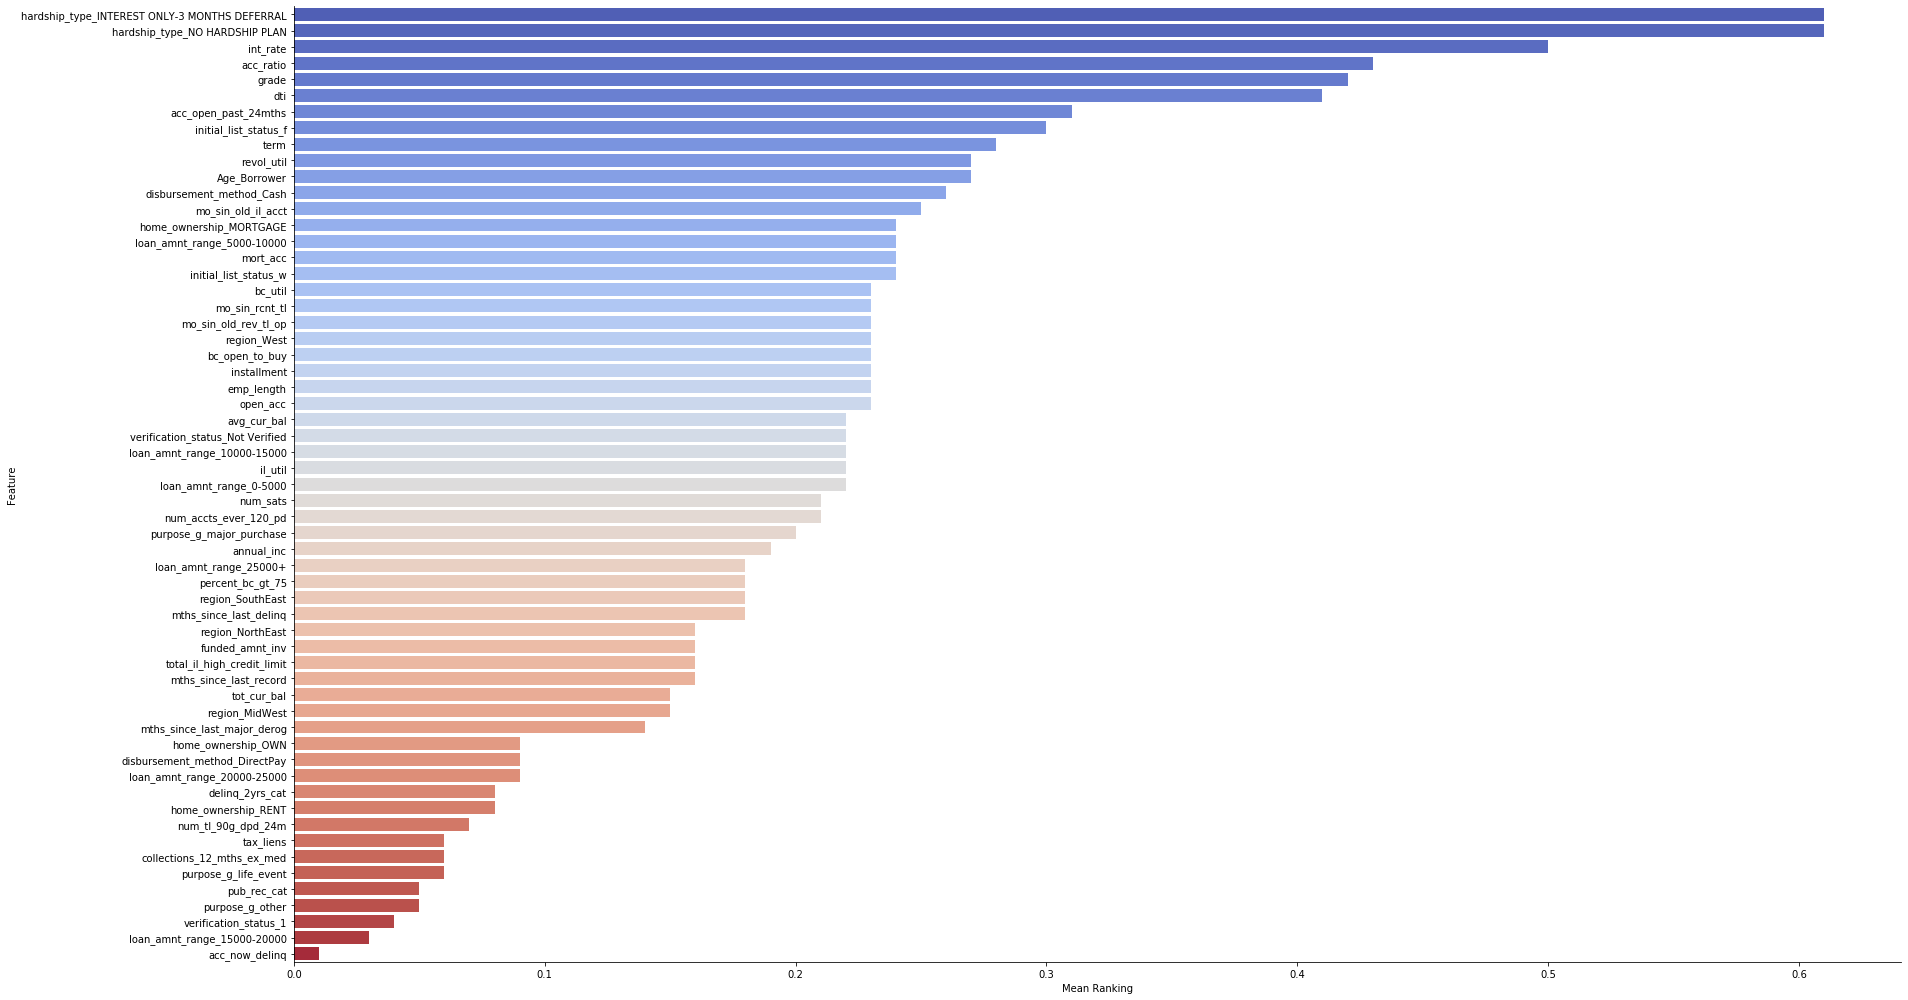

In [31]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [32]:
top5_features = list(meanplot.sort_values('Mean Ranking', ascending=False)[:5].Feature)

In [33]:
top5_features

['hardship_type_INTEREST ONLY-3 MONTHS DEFERRAL',
 'hardship_type_NO HARDSHIP PLAN',
 'int_rate',
 'acc_ratio',
 'grade']

### Escalamiento de Variables Independientes


Ahora escalaremos las variables independientes usando el Standard Scaler (de los datasets de Train y Test)

In [107]:
scaler = StandardScaler()
# Lo entrenamos según las variables del train
scaler.fit(X_train)

# Transforma los datos de entrenamiento y prueba
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Creamos un diccionario con los valores de Train y Test para ejecutar los modelos.

In [108]:
data_dict = {'X_train':X_train, 'y_train':y_train, 
           'X_test':X_test, 'y_test':y_test} 

In [109]:
X_test.shape

(325634, 60)

In [110]:
X_train.shape

(980547, 60)

### Funciones para el procesamiento de los modelos

#### Función para buscar los valores óptimos dentro de la cuadricula de busqueda: se ejecuta mediante la función CVGridSearch.

In [36]:
def find_opt_params_on_edge(cv_model):
    out = False
    
    for i in cv_model.param_grid:
        if cv_model.best_params_[i] in [ cv_model.param_grid[i][0], cv_model.param_grid[i][-1] ]:
            out = True
            break
            
    return out

#### Función para imprimir el modelo en un archivo.

In [37]:
def dump_to_output(key, value):
    with open(output_file, "a") as f:
        f.write(",".join([str(random_state), key, str(value)]) + "\n")

#### Función para calcular la diferencia porcentual entre las mejores y peores puntuaciones mediante la función CVGridSearch

In [38]:
def find_score_variation(cv_model):
    all_scores = cv_model.cv_results_['mean_test_score']
    return( np.abs((max(all_scores) - min(all_scores))) * 100 / max(all_scores) )

#### Función Fit Classification, utiliza el CVGridSearch para generar los valores óptimos.
Esta función ajustará un modelo de clasificación a los datos e imprimirá varias medidas de evaluación. Espera los siguientes parámetros
      - modelo: un objeto modelo sklearn
      - data_dict: el diccionario que contiene datos de entrenamiento y prueba.
      - cv_parameters: un diccionario de parámetros que debe optimizarse mediante el uso de CVGridSearch. Específicamente, cada cada identificador debe corresponder a un parámetro, y cada elemento debe ser una lista que contenga los valores para optimizar
      - nombre_modelo: el nombre del modelo que se está ajustando, para graficos e impresiones.
      - random_state: la semilla aleatoria a usar.
      - output_to_file: si los resultados se guardarán en el archivo de salida.
      - print_to_screen: si los resultados se imprimirán en la pantalla.

    Si el modelo proporcionado no tiene una función predict_proba, simplemente se imprimirá diagnósticos de precisión.
    Si el modelo proporcionado tiene una función predict_proba, primero se calcula el umbral óptimo que maximiza la precisión e se imprime su diagnóstico. Luego se imprime la curva ROC, la curva de sensibilidad / especificidad y la curva de calibración.
    
    La función devuelve un diccionario con las siguientes entradas
      - modelo: el modelo mejor ajustado según GridSearchCV
      - y_pred: predicciones para el dataset Test
      - y_pred_probs: predicciones de probabilidad para el el dataset Test, si el modelo las admite.
      - y_pred_score: puntajes de predicción para el dataset Test, si el modelo no genera probabilidades.

In [59]:
def fit_classification(model, data_dict,
                          cv_parameters = {},
                          model_name = None,
                          random_state = random_state,
                          output_to_file = True,
                          print_to_screen = True,
                          get_model = True):
 
    np.random.seed(random_state)
    
    # --------------------------
    #   Paso 1 - Particion del Dataset
    # --------------------------
    X_train = data_dict['X_train']
    y_train = data_dict['y_train']
    
    X_test = data_dict['X_test']
    y_test = data_dict['y_test']
    tiempo = ''
  
    # --------------------------
    #   Paso 2 - Ajuste del modelo
    # --------------------------
    if get_model:
        cv_model = GridSearchCV(model, cv_parameters)
    
        start_time = time.time()
        cv_model.fit(X_train, y_train)
        end_time = time.time()
        best_model = cv_model.best_estimator_
        tiempo =str(round(end_time - start_time, 2)) 
    else:
        cv_model = model
        tiempo='0'
        best_model = model.best_estimator_
    
    if print_to_screen:

        if model_name != None:
            print("=========================================================")
            print("  Modelo: " + model_name)
            print("=========================================================")
            

        #print("Tiempo Ajuste: " + str(round(end_time - start_time, 2)) + " seg.")
        print("Tiempo Ajuste: " + tiempo + " seg.")
        print("Párametros óptimos:")
        print(cv_model.best_params_)
        print("")

    # -------------------------------
    #   Paso 3 - Evalua el modelo
    # -------------------------------
    
    # Si es posible, genera las probabilidades de las predicciones
    try:
        y_pred_probs = best_model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
        
        probs_predicted = True
    except:
        probs_predicted = False
    
    # Estima las predicciones; Si se tiene las probabilidades, usa el umbral que maximice 
    # la precisión en el dataset Train. 
    # Si no, simplemente use la función de predicción de aprendizaje (demo)
    if probs_predicted:
        y_train_pred_probs = best_model.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_probs)
        
        true_pos_train = tpr_train*(y_train.sum())
        true_neg_train = (1 - fpr_train) *(1-y_train).sum()
        
        best_threshold_index = np.argmax(true_pos_train + true_neg_train)
        best_threshold = 1 if best_threshold_index == 0 else thresholds_train[ best_threshold_index ]
        
        if print_to_screen:
            print("El umbral de máxima precisión fue: " + str(best_threshold))
        
        y_pred = (y_pred_probs > best_threshold)
    else:
        y_pred = best_model.predict(X_test)
    scores = {}
    if print_to_screen:
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names =['No default', 'Default'], digits = 4))
    scores['Accuracy'] = accuracy_score(y_test, y_pred)
    scores['precision'] = precision_score(y_test, y_pred)
    scores['recall'] = recall_score(y_test, y_pred)
    scores['f1'] = f1_score(y_test, y_pred)
    scores['roc_auc_score'] = roc_auc_score(y_test, y_pred_probs)
    if print_to_screen:
        if probs_predicted:        
            plt.figure(figsize = (13, 4.5))
            plt.subplot(2, 2, 1)

            plt.title("Curva ROC (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
            plt.plot(fpr, tpr, 'b')
            plt.plot([0,1],[0,1],'r--')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.ylabel('Ratio de Verdaderos Positivos')
            plt.xlabel('Ratio de Falsos Positivos')

            plt.subplot(2, 2, 3)

            plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
            plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
            plt.legend(loc = 'lower right')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.xlabel('Umbral')

            plt.subplot(2, 2, 2)

            fp_0, mpv_0 = calibration_curve(y_test, y_pred_probs, n_bins = 10)
            plt.plot([0,1], [0,1], 'k:', label='Perfectamente calibrado')
            plt.plot(mpv_0, fp_0, 's-')
            plt.ylabel('Porcentaje de Positivos')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.legend(loc ='upper left')
            
            plt.subplot(2, 2, 4)
            plt.hist(y_pred_probs, range=(0, 1), bins=10, histtype="step", lw=2)
            plt.xlim([0,1]); plt.ylim([0,20000])
            plt.xlabel('Probabilidad media Pronosticada Correcta')
            plt.ylabel('Cuenta')
            
            plt.show()
    
    # Retorna las predicciones y el dataset Test
    # -------------------------------------
    out = {'model':best_model, 'y_pred_labels':y_pred}
    
    if probs_predicted:
        out.update({'y_pred_probs':y_pred_probs})
    else:
        y_pred_score = best_model.decision_function(X_test)
        out.update({'y_pred_score':y_pred_score})
        
    # Resultados de Salida guardados en Archivo
    # ----------------------
    if probs_predicted and output_to_file:
        if get_model:
            # Se comprueba si alguno de los parámetros de CV está en el borde del espacio de búsqueda
            opt_params_on_edge = find_opt_params_on_edge(cv_model)
            dump_to_output(model_name + "::search_on_edge", opt_params_on_edge)
            if print_to_screen:
                print("Hay párametros en los extremos? : " + str(opt_params_on_edge))

            # Revisa cuán diferentes son los puntajes para los diferentes valores probados por validación cruzada. 
            # Si no son muy diferentes e incluso si los parámetros están fuera del borde de la cuadrícula de búsqueda, 
            # si esto no sucede deberían estar bien
            score_variation = find_score_variation(cv_model)
            dump_to_output(model_name + "::score_variation", score_variation)
            if print_to_screen:
                print("Variaciones de Puntaje en CV search grid : " + str(score_variation))

            # Imprime los puntajes
            dump_to_output(model_name + "::all_cv_scores", str(cv_model.cv_results_['mean_test_score']))
            if print_to_screen:
                print( str(cv_model.cv_results_['mean_test_score']) )
        
        # Se guarda la curva ROC
        dump_to_output(model_name + "::roc_auc", roc_auc_score(y_test, y_pred_probs) )
        
    return out,scores

#### Función Matriz de Confusión
Se utiliza la libreria Matplotlib para mostrar la matriz de confusión de forma gráfica, con sombreados y porcentajes de los Verdaderos Positivos, Falsos Positivos y Falsos Negativos.
Los párametros de entrada son los valores reales y los prónosticados del modelo.

In [40]:
def plot_confusion_matrix(actual, predicted, normalize=False): 
    cm = confusion_matrix(actual, predicted)
    classes=["No Default", "Default"]
    cmap = plt.cm.Blues
    title = "Matriz Confusión"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Prónostico')

## Modelos


### Modelo Regresión Logístico

El problema que resuelve la regresión logística es expresar la probabilidad de cierto desenlace (Y=1) en función de n variables X1, X2 … Xn las cuales pueden ser de cualquier naturaleza (continuas, discretas, dicotómicas, ordinales o nominales, aunque en este último caso han de manejarse a través de variables dummy). Concretamente, el resultado fundamental del modelo consiste en hallar los coeficientes β0, β1 … βr, que mejor se ajustan al resultado.
A continuación, generamos un modelo de regresión logística mediante la libreria GridSearchCV para obtener los mejores hiperparametros. Adicionalmente le asignamos la penalidad de L2 (Ridge).

  Modelo: Regression Logistica 1
Tiempo Ajuste: 213.83 seg.
Párametros óptimos:
{'C': 10}

El umbral de máxima precisión fue: 0.4999277518041644
Accuracy:  0.7936241301583987
              precision    recall  f1-score   support

  No default     0.8046    0.9741    0.8813    256031
     Default     0.5766    0.1297    0.2118     69603

    accuracy                         0.7936    325634
   macro avg     0.6906    0.5519    0.5465    325634
weighted avg     0.7559    0.7936    0.7382    325634



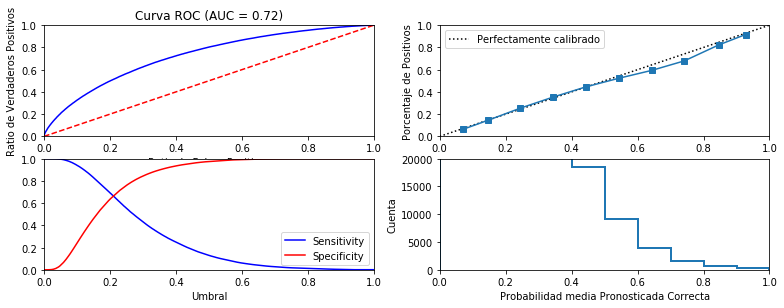

Hay párametros en los extremos? : True
Variaciones de Puntaje en CV search grid : 0.005273306033272236
[0.79292579 0.79292375 0.79292273 0.79288397]


({'model': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'y_pred_labels': array([False, False, False, ..., False, False, False]),
  'y_pred_probs': array([0.16617308, 0.13254445, 0.29893767, ..., 0.29290151, 0.07914517,
         0.17591734])},
 {'Accuracy': 0.7936241301583987,
  'precision': 0.5766479305058764,
  'recall': 0.12970705285691708,
  'f1': 0.21177822869139917,
  'roc_auc_score': 0.72432327313836})

In [115]:
log1 = LogisticRegression(penalty='l2')
cv_parameters = {'C':[10, 1, .1, .001]}

log1,scores = fit_classification(log1,data_dict,cv_parameters,'Regression Logistica 1',
                                 random_state, True, True)
log1,scores

Este Modelo obtuvo un accuracy de 0.79, con una curva ROC de 0.72.

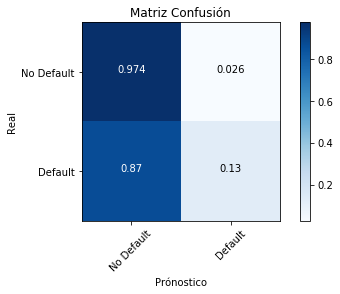

In [116]:
plot_confusion_matrix(y_test,log1['y_pred_labels'],normalize=True)

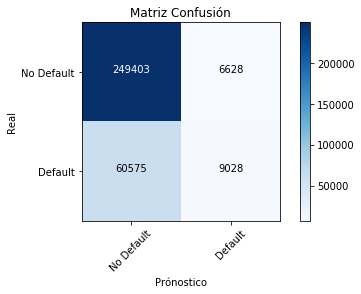

In [117]:
plot_confusion_matrix(y_test,log1['y_pred_labels'],normalize=False)

Mediante la libreria pickle guardamos el modelo en un archivo sav.

In [118]:
filename = 'logistic_rfe.sav'
pickle.dump(log1['model'], open(filename, 'wb'))

### Gradient Boost
Es una técnica de aprendizaje automático utilizado para el análisis de la regresión y para problemas de clasificación estadística, el cual produce un modelo predictivo en forma de un conjunto de modelos de predicción débiles, típicamente árboles de decisión. Construye el modelo de forma escalonada como lo hacen otros métodos de boosting, y los generaliza permitiendo la optimización arbitraria de una función de pérdida diferenciable.

De forma similar a los anteriores modelos, se utilizará la función GridSearchCV para obtener los estimadores óptimos del Gradient Boost.

In [49]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [50]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = random_state)

In [52]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=random_state )

In [53]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [55]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 81.1min finished



 Time taken: 1 hours 44 minutes and 58.14 seconds.


In [56]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([1642.78744006, 1482.13761957,  716.96459587, 1135.65305495,
        895.70709769]), 'std_fit_time': array([ 10.9738508 ,  17.02004274,   2.05874163,  16.02481082,
       129.36871401]), 'mean_score_time': array([ 9.69854132, 11.88606524,  7.59442449,  7.17233992,  8.54264959]), 'std_score_time': array([0.12785238, 0.05893137, 0.05095103, 0.39260283, 0.72765988]), 'param_subsample': masked_array(data=[0.6, 1.0, 1.0, 0.8, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 1, 5, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 5, 3, 3, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 2, 0.5, 5, 0.5],
             mask=[False, False, False, False,

  Modelo: Gradient Boost
Tiempo Ajuste: 0 seg.
Párametros óptimos:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}

El umbral de máxima precisión fue: 0.48066336
Accuracy:  0.7964555298279664
              precision    recall  f1-score   support

  No default     0.8086    0.9709    0.8824    256031
     Default     0.5913    0.1546    0.2451     69603

    accuracy                         0.7965    325634
   macro avg     0.6999    0.5628    0.5637    325634
weighted avg     0.7621    0.7965    0.7462    325634



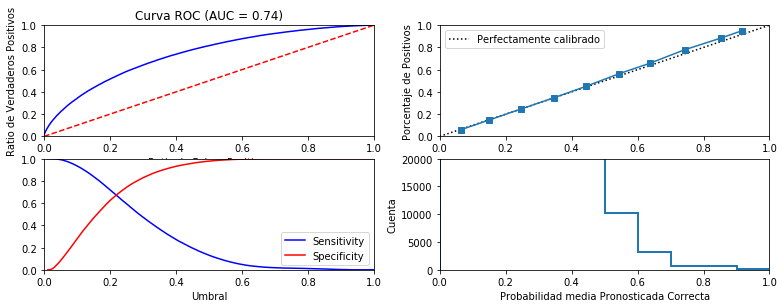

In [111]:
rs1,scores = fit_classification(random_search,data_dict,params,'Gradient Boost',
                                 random_state, True, True, False)

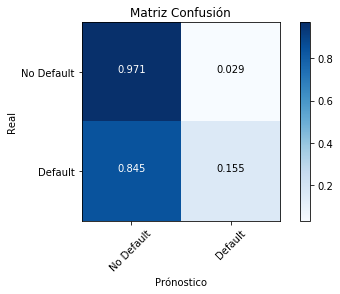

In [112]:
plot_confusion_matrix(y_test,rs1['y_pred_labels'],normalize=True)

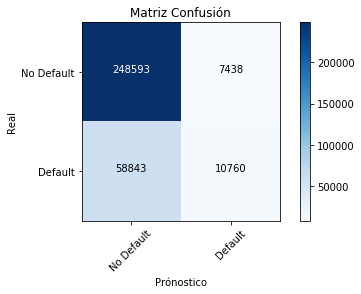

In [113]:
plot_confusion_matrix(y_test,rs1['y_pred_labels'])

In [65]:
len(rs1['y_pred_labels'])

980547

In [114]:
modelo=rs1['model']
filename = 'gradboost.sav'
pickle.dump(modelo, open(filename, 'wb'))

Se obtuvo un modelo Gradient Boost con un accuracy de 0.7971 y con una curva ROC de 0.74. La mejor a comparación de la Regresión Logística.

## Conclusiones

* Con el conjunto de datos Train y Test entregado en la clase realizamos los ajustes como conversion de variables categoricas a dummy y selección de las variables según la prueba del T-student y el Chi Square.
* Con las funciones de Grid Search y Randomized Search obtenemos los modelos de Regresión logística.
* El mejor modelo resulto ser el Gradient Boost.